# Bank Customers Churn DNN

### https://www.kaggle.com/datasets/santoshd3/bank-customers

### Columns Description

This dataset belongs to the bank that is hidden its name because of data security. The dataset consists of 13 attributes and 10,000 rows. The following shows description of attributes.

Customer ID: This attribute is unique and assume that primary key

Surname: it belongs to surname of customer and string values

Geography: it shows country of customer

Gender: male/female

Credit Score: it gives credit score of customers. That score calculates interbank system. High score shows that the customer debt high repayment capacity.

Age: age of customers

Tenure: The number of ages the customer is in the bank.

Balance: Customer's money in the bank.

Number of Products: Number of products owned by the customer.

Credit Card: Whether the customer has a credit card

Active Status: Customer's presence in the bank

Estimated Salary: Customer's estimated salary

Exited: Churn or not

In [631]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [632]:
# load data set
df = pd.read_csv("project_data_backend/Churn_Modeling.csv")
df.shape

(10000, 14)

In [633]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


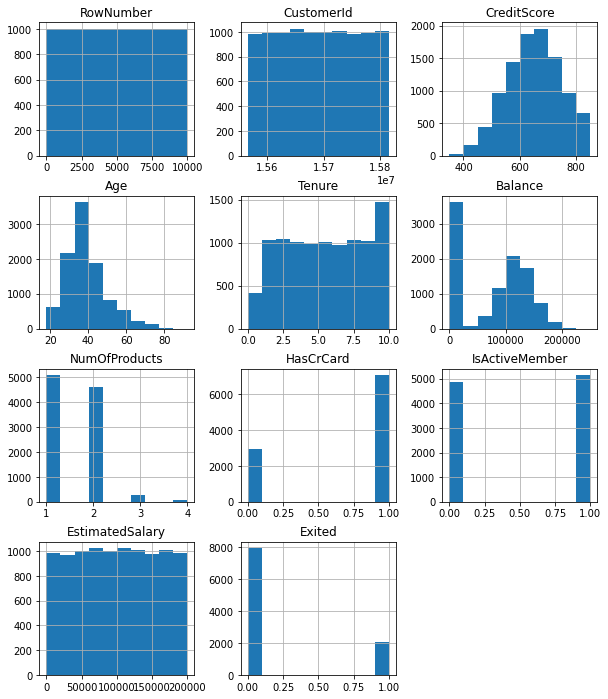

In [634]:
_ = df.hist(figsize=(10, 12))

In [635]:
df = df.drop(["RowNumber","CustomerId","Surname"], axis=1) # remove irrelevant columns for prediction
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [636]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [637]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


38.9218

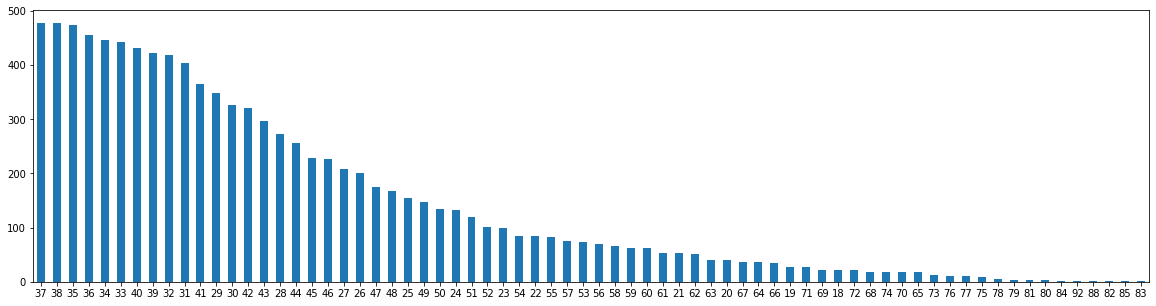

In [638]:
df["Age"].value_counts().plot.bar(figsize=(20,5),rot=0) # distributions of Age column
df["Age"].mean()

In [639]:
df['Geography'].value_counts() 

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

<AxesSubplot:xlabel='Geography'>

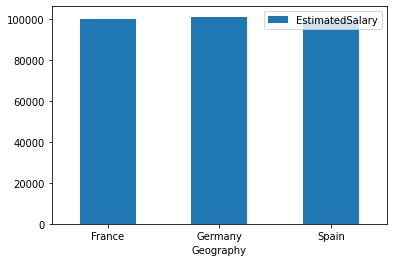

In [640]:
nation_sal = df.groupby('Geography')['EstimatedSalary'].mean() # To see how salaries are different by nations, seems like nearly equal
pd.DataFrame(nation_sal).plot(kind='bar',rot=0)


In [641]:
df = df.drop('Geography', axis=1) # drop the geo column because seems like irrelevant
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1


In [642]:
df_ohe = pd.get_dummies(df) # Apply one hot encoding to convert categorical values to numerical values
df_ohe

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


### Split

In [643]:
label_name = "Exited"
label_name

'Exited'

In [644]:
from sklearn.model_selection import train_test_split

label_name='Exited'
X=df_ohe.drop(columns=label_name)
y=df_ohe[label_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

### Modeling

In [645]:
import tensorflow as tf

In [646]:
# input_shape 값을 구합니다. feature의 수로 만듭니다.
input_shape = len(X_train.keys())
input_shape

10

In [647]:

model = tf.keras.models.Sequential([
                                  tf.keras.layers.Dense(6, activation='relu',input_shape=[input_shape]),
                                  tf.keras.layers.Dense(6, activation='relu'),
                                  tf.keras.layers.Dropout(0.1),
                                  tf.keras.layers.Dense(4, activation='relu'),
                                  tf.keras.layers.Dropout(0.1),
                    
                                  tf.keras.layers.Dense(1, activation='sigmoid')
                                  ])
# model

### Compiling

In [648]:
# 모델 컴파일

model.compile(optimizer="adam", 
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [649]:
# 모델 요약
model.summary()

Model: "sequential_54"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_287 (Dense)           (None, 6)                 66        
                                                                 
 dense_288 (Dense)           (None, 6)                 42        
                                                                 
 dropout_149 (Dropout)       (None, 6)                 0         
                                                                 
 dense_289 (Dense)           (None, 4)                 28        
                                                                 
 dropout_150 (Dropout)       (None, 4)                 0         
                                                                 
 dense_290 (Dense)           (None, 1)                 5         
                                                                 
Total params: 141
Trainable params: 141
Non-trainable

### Training

In [650]:
class PrintDot(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [651]:
X_train.astype(float)
history = model.fit(X_train, y_train, epochs=10000, validation_split=0.1, 
                    callbacks=[early_stop, PrintDot()], verbose=0)
history


............................

In [652]:
# comparison with a DataFrame
df_hist = pd.DataFrame(history.history)
df_hist.tail()

,loss,accuracy,val_loss,val_accuracy
23,0.509819,0.793472,0.495556,0.80375
24,0.509878,0.793472,0.495517,0.80375
25,0.509516,0.793472,0.495528,0.80375
26,0.509325,0.793472,0.495510,0.80375
27,0.509447,0.793472,0.495534,0.80375


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


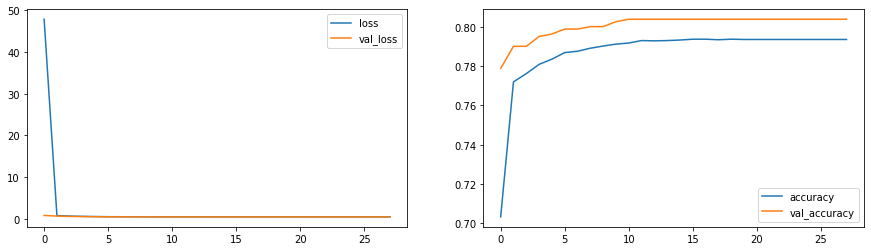

In [653]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
_=df_hist[['loss', 'val_loss']].plot(ax=axes[0])

_=df_hist[['accuracy', 'val_accuracy']].plot(ax=axes[1])

### Prediction

In [654]:
y_pred = model.predict(X_test).flatten()
y_pred.shape

(2000,)

In [655]:
y_predict = (y_pred > 0.5).astype(int)
y_predict

array([0, 0, 0, ..., 0, 0, 0])

### Evaluation

In [656]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('\n테스트 정확도:', test_acc)

63/63 [==============================] - 0s 978us/step - loss: 0.4959 - accuracy: 0.8035

테스트 정확도: 0.8034999966621399


#### 데이터의 불균형 분포로 인한 문제라고 판단, 스케일링을 진행해보기로 하였다.

# Scaling

In [657]:
# StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

### StandardScaler

In [658]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.fit_transform(X_test)

In [659]:
model_ss = tf.keras.models.Sequential([
                                  tf.keras.layers.Dense(6, activation='relu',input_shape=[input_shape]),
                                  tf.keras.layers.Dense(6, activation='relu'),
                                  tf.keras.layers.Dropout(0.1),
                                  tf.keras.layers.Dense(6, activation='relu'),
                                  tf.keras.layers.Dropout(0.1),
                    
                                  tf.keras.layers.Dense(1, activation='sigmoid')
                                  ])
model_ss


In [660]:

model_ss.compile(optimizer="SGD", 
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [661]:

history_ss = model_ss.fit(X_train_ss, y_train, epochs=1000, validation_split=0.2, 
                    callbacks=[early_stop, PrintDot()], verbose=0)
history_ss


....................................................................................................
...................

In [662]:
df_hist_ss = pd.DataFrame(history_ss.history)
df_hist_ss.tail()

,loss,accuracy,val_loss,val_accuracy
114,0.372036,0.845469,0.351927,0.854375
115,0.371313,0.845781,0.352083,0.856250
116,0.374126,0.841875,0.352482,0.853750
117,0.365411,0.848906,0.351643,0.854375
118,0.371390,0.842812,0.352498,0.852500


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


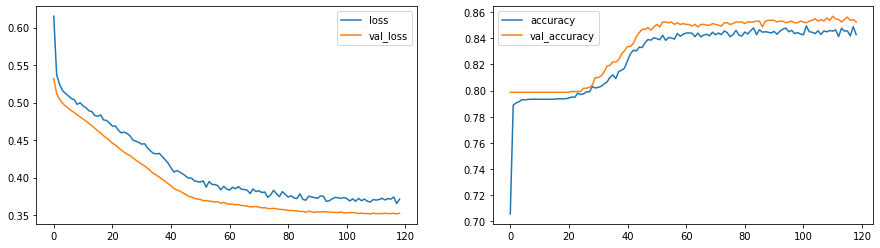

In [663]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
_=df_hist_ss[['loss', 'val_loss']].plot(ax=axes[0])

_=df_hist_ss[['accuracy', 'val_accuracy']].plot(ax=axes[1])

In [664]:
y_pred_ss = model.predict(X_test_ss).flatten()

y_pred_ss

array([0.20727366, 0.2088328 , 0.20804057, ..., 0.20747063, 0.20727366,
       0.20727366], dtype=float32)

In [665]:
# 특정값 이상이면 True 아니면 False
y_predict_ss = (y_pred_ss > 0.5).astype(int)
y_predict_ss

array([0, 0, 0, ..., 0, 0, 0])

In [666]:
test_loss_ss, test_acc_ss = model_ss.evaluate(X_test_ss, y_test)
print('\n테스트 정확도:', test_acc_ss)

63/63 [==============================] - 0s 957us/step - loss: 0.3484 - accuracy: 0.8570

테스트 정확도: 0.8569999933242798


### MinMaxScaler

In [667]:
mm = MinMaxScaler()
X_train_mm = mm.fit_transform(X_train)
X_test_mm = mm.fit_transform(X_test)

In [668]:
# model_mm = tf.keras.models.Sequential([
#                                   tf.keras.layers.Dense(6, activation='relu',input_shape=[input_shape]),
#                                   tf.keras.layers.Dense(6, activation='relu'),
#                                   tf.keras.layers.Dropout(0.1),
#                                   tf.keras.layers.Dense(6, activation='relu'),
#                                   tf.keras.layers.Dense(6, activation='relu'),
#                                   tf.keras.layers.Dropout(0.1),
#                                   tf.keras.layers.Dense(6, activation='relu'),
#                                   tf.keras.layers.Dropout(0.1),
#                                   tf.keras.layers.Dense(1, activation='sigmoid')
#                                   ])
model_mm = tf.keras.models.Sequential([
                                  tf.keras.layers.Dense(6, activation='relu',input_shape=[input_shape]),
                                  tf.keras.layers.Dense(6, activation='relu'),
                                  tf.keras.layers.Dropout(0.1),
                                  tf.keras.layers.Dense(6, activation='relu'),
                                  tf.keras.layers.Dropout(0.1),
                    
                                  tf.keras.layers.Dense(1, activation='sigmoid')
                                  ])

In [669]:

model_mm.compile(optimizer="SGD", 
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [670]:
history_mm = model_mm.fit(X_train_mm, y_train, epochs=1000, validation_split=0.1, 
                    callbacks=[early_stop, PrintDot()], verbose=0)
history_mm


....................................................................................................
....................................................................................................
.

In [671]:
df_hist_mm = pd.DataFrame(history_mm.history)
df_hist_mm.tail()

,loss,accuracy,val_loss,val_accuracy
196,0.381520,0.844583,0.347471,0.85750
197,0.381389,0.847222,0.346162,0.85875
198,0.386793,0.839861,0.348318,0.86250
199,0.380220,0.843750,0.344555,0.86250
200,0.382208,0.844167,0.348785,0.85250


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


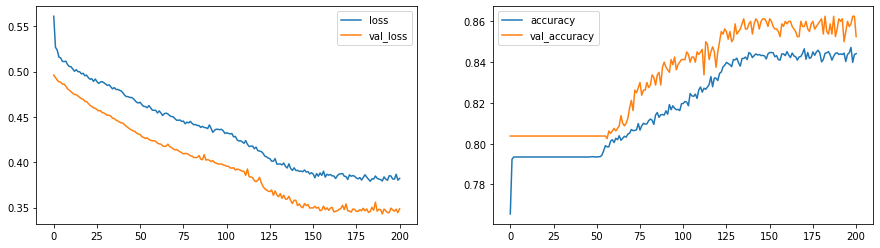

In [672]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
_=df_hist_mm[['loss', 'val_loss']].plot(ax=axes[0])

_=df_hist_mm[['accuracy', 'val_accuracy']].plot(ax=axes[1])

In [673]:
y_pred_mm = model.predict(X_test_mm).flatten()
y_pred_mm

array([0.20790312, 0.20727366, 0.20730168, ..., 0.20731145, 0.20727366,
       0.20727366], dtype=float32)

In [674]:
# 특정값 이상이면 True 아니면 False
y_predict_mm = (y_pred_mm > 0.5).astype(int)
y_predict_mm

array([0, 0, 0, ..., 0, 0, 0])

In [675]:
test_loss_mm, test_acc_mm = model_mm.evaluate(X_test_mm, y_test)
print('\n테스트 정확도:', test_acc_mm)

63/63 [==============================] - 0s 974us/step - loss: 0.3705 - accuracy: 0.8535

테스트 정확도: 0.8535000085830688


### RobustScaler

In [676]:
rs = RobustScaler()
X_train_rs = rs.fit_transform(X_train)
X_test_rs = rs.fit_transform(X_test)

In [677]:
model_rs = tf.keras.models.Sequential([
                                  tf.keras.layers.Dense(6, activation='relu',input_shape=[input_shape]),
                                  tf.keras.layers.Dense(6, activation='relu'),
                                  tf.keras.layers.Dropout(0.1),
                                  tf.keras.layers.Dense(6, activation='relu'),
                                  tf.keras.layers.Dropout(0.1),
                    tf.keras.layers.Dropout(0.1),
                                  tf.keras.layers.Dense(1, activation='sigmoid')
                                  ])
model_rs

In [678]:

model_rs.compile(optimizer="SGD", 
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [679]:
history_rs = model_rs.fit(X_train_rs, y_train, epochs=1000, validation_split=0.2, 
                    callbacks=[early_stop, PrintDot()], verbose=0)
history_rs


....................................................................................................
....................................................................................................
...................

In [680]:
df_hist_rs = pd.DataFrame(history_rs.history)
df_hist_rs.tail()

,loss,accuracy,val_loss,val_accuracy
214,0.375641,0.846875,0.355599,0.856250
215,0.377514,0.843281,0.353090,0.853750
216,0.371849,0.846094,0.354118,0.855625
217,0.373940,0.848281,0.353655,0.852500
218,0.371045,0.845000,0.353688,0.858125


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


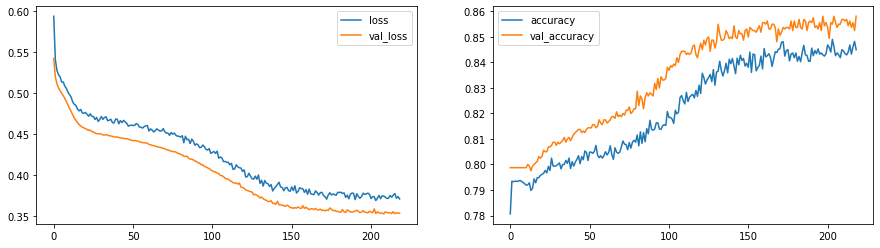

In [681]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
_=df_hist_rs[['loss', 'val_loss']].plot(ax=axes[0])

_=df_hist_rs[['accuracy', 'val_accuracy']].plot(ax=axes[1])

In [682]:
y_pred_rs = model.predict(X_test_rs).flatten()
y_pred_rs

array([0.20727366, 0.20818704, 0.20754713, ..., 0.20727366, 0.20737517,
       0.20750633], dtype=float32)

In [683]:
y_predict_rs = (y_pred_rs > 0.5).astype(int)
y_predict_rs

array([0, 0, 0, ..., 0, 0, 0])

In [684]:
test_loss_rs, test_acc_rs = model_rs.evaluate(X_test_rs, y_test)
print('\n테스트 정확도:', test_acc_rs)

63/63 [==============================] - 0s 943us/step - loss: 0.3467 - accuracy: 0.8560

테스트 정확도: 0.8560000061988831


### 정리
* 스케일링을 통해 얻은 점은 이 데이터의 변수간의 숫자 범위 값이 매우 크므로 스케일링의 필요성이 더욱 돋보였다. 결론적으로 데이터를 살펴보고 범위스케일링 여부를 판단하는게 중요하다고 느꼈다.

* 은닉층의 여러 손실 함수중 가장 기본인 adam을 써보고 ndam과 SGD를 써봤는데, 이 데이터에서는 SGD가 좀 더 높은 정확도를 보였고 이 역시 결과에 있어서 어느정도 차이를 가져온다.

* 이 데이터의 경우 Dense layer 갯수를 늘리는 건 결과에 크게 반영되지 않았다.

* 활성화 함수 역시 relu와 selu를 사용하여 조정하였지만 relu가 미세하게 selu보다 나은 정확도를 보여주었다.
